# Understanding Good White Wines

## Dataset Information

### Citation

P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis. 
Modeling wine preferences by data mining from physicochemical properties.
In Decision Support Systems, Elsevier, 47(4):547-553. ISSN: 0167-9236. 

Available at: <br> <br>
[@Elsevier] http://dx.doi.org/10.1016/j.dss.2009.05.016 <br>
[Pre-press (pdf)] http://www3.dsi.uminho.pt/pcortez/winequality09.pdf <br>
[bib] http://www3.dsi.uminho.pt/pcortez/dss09.bib <br>
     
### Summary

In the above reference, two datasets were created, using red and white wine samples.
The inputs include objective tests (e.g. pH values) and the output is based on sensory data
(median of at least 3 evaluations made by wine experts). Each expert graded the wine quality 
between 0 (very bad) and 10 (very excellent).

### Features
   - **fixed acidity (nonvolatile acids)**: acids that do not evaporate when wine is heated.   
   - **volatile acidity**: acids that evaporate when wine heated, when in high amounts can give an unpleasant taste.
   - **citric acid**: type of fixed acid, added to wines to increase acidity or give a 'fresh' flavor. 
   - **residual sugar**: any natural grape sugars that are leftover after fermentation is done.
   - **chlorides**: contribute to the saltiness of the wine.
   - **free sulfur dioxide**: component of 'total sulfur dioxide', used to protect against microbes and oxidation.
   - **total sulfur dioxide**: free sulfur dioxide + bound sulfur dioxide  
   - **density**: used as a measure of the conversion of sugar to alcohol (ie. finished wine has less sugar but lots of alcohol and thus has a lower density)
   - **pH**: describes how acidic (0-6) or basic (8-14) the wine is. 
   - **sulphates**: a wine additive which can contribute to sulfur dioxide levels, which acts as an antimicrobial and antioxidant
   - **alcohol**: percentage of alcohol present in the wine.

### Target variable
   - **quality**: score given to the wine between 0 (lowest) and 10 (highest).
   
### Goal 
The goal is to understand and identify what qualities make a good white wine, and pinpoint how exactly each characterisitc positvely or negatively can affect the the quality of white wine. This dataset can either be approached by using classification or regression. Today, I will attempt to understand the relationships utilizing regression. By understanding these relationship, I can make better decisions when purchasing wine.

## Exploratory Data Analysis (EDA)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

%matplotlib inline

In [2]:
white_wine = pd.read_csv('../wine-quality/winequality-white.csv', sep = ';')
white_wine.columns = [c.lower().replace(' ', '_') for c in white_wine.columns]

white_wine.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,ph,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [3]:
# colors I will be using in this notebook
Spectral = sns.color_palette("Spectral_r", n_colors=len(white_wine.columns))
dark_yellow = Spectral[8]
light_yellow = Spectral[5]

# ignore warnings
warnings.filterwarnings(action = 'ignore')

In [4]:
# Check for null values
print('White Wine: ')
print(white_wine.isnull().any())

White Wine: 
fixed_acidity           False
volatile_acidity        False
citric_acid             False
residual_sugar          False
chlorides               False
free_sulfur_dioxide     False
total_sulfur_dioxide    False
density                 False
ph                      False
sulphates               False
alcohol                 False
quality                 False
dtype: bool


In [5]:
# start EDA - get shape
print("White Wine Df Dimensions:", white_wine.shape)

White Wine Df Dimensions: (4898, 12)


In [6]:
# get datatypes
print("White Wine datatypes: \n")
print(white_wine.dtypes)

White Wine datatypes: 

fixed_acidity           float64
volatile_acidity        float64
citric_acid             float64
residual_sugar          float64
chlorides               float64
free_sulfur_dioxide     float64
total_sulfur_dioxide    float64
density                 float64
ph                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object


In [7]:
# get statistics for white wine target variable
print("White wine 'quality' statistics:")
white_wine['quality'].describe()

White wine 'quality' statistics:


count    4898.000000
mean        5.877909
std         0.885639
min         3.000000
25%         5.000000
50%         6.000000
75%         6.000000
max         9.000000
Name: quality, dtype: float64

In [8]:
# styling for seaborn
sns.set(style="darkgrid")
sns.set(font_scale = 1.2)

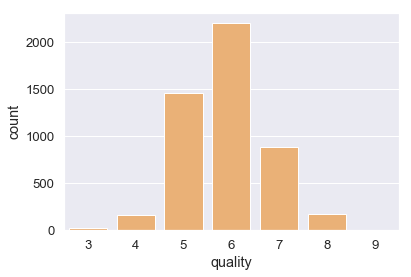

In [9]:
sns.countplot(white_wine['quality'], color =dark_yellow)

The distribution of white wine frequencies looks roughly normal. The most common wines in the dataset are either 5 or 6. 

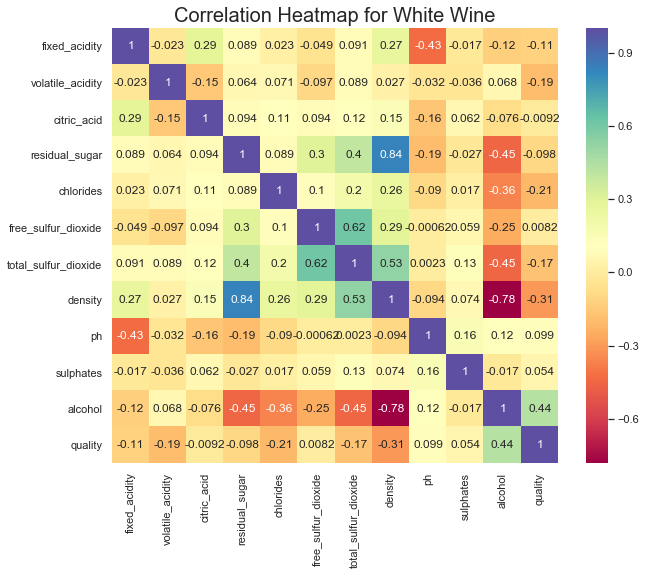

In [10]:
# see correlations of white wine features
sns.set(font_scale = 1)
white_wine_corr = white_wine.corr()
white_wine_corr = (white_wine_corr)
plt.figure(figsize=(10,8))
sns.heatmap(white_wine_corr, 
            xticklabels = white_wine_corr.columns.values,
            yticklabels = white_wine_corr.columns.values,
            annot=True,
            cmap = 'Spectral')
plt.title('Correlation Heatmap for White Wine', fontsize = 20)
# white_wine_corr
sns.set(font_scale = 1.2)

In [11]:
# display quality correlations in descending order
# exclude last index because quality correlates 100% with itself
print('White Wine Quality Correlations: \n')
print(white_wine_corr['quality'][:-1].sort_values(ascending = False))

White Wine Quality Correlations: 

alcohol                 0.435575
ph                      0.099427
sulphates               0.053678
free_sulfur_dioxide     0.008158
citric_acid            -0.009209
residual_sugar         -0.097577
fixed_acidity          -0.113663
total_sulfur_dioxide   -0.174737
volatile_acidity       -0.194723
chlorides              -0.209934
density                -0.307123
Name: quality, dtype: float64


We see that alcohol, ph, sulphates, and free_sulfur dioxide positively correlate with our target, quality. Let's explore this features in how they react with the target as well as each other!

In [12]:
from scipy.stats import skew
from scipy.stats import kurtosis

In [13]:
# creating log transformation dataframe (except for 'quality')
white_wine_log = pd.DataFrame()
for feature in white_wine.columns:
    if (feature != 'quality'):
        white_wine_log[feature] = np.log(white_wine[feature] + 1)
        
white_wine_log['quality'] = white_wine.quality

When performing linear regressions it is important that our features be normally distributed for optimal results. I have created a function that checks on a certain feature to see its 'visual' distribution characterisitcs, skewness and kurtosis. Also, I have created a function that allows me to plot two features against each other in order to visualize their relationship.

In [14]:
def check_dist(feature, log_feature, log = True):
    fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize=(18, 6))
    axes = axes.flatten()
 
    sns.distplot(feature, color = dark_yellow, ax = axes[0]).set_title('{}'.format(feature.name))
    print('--{}--'.format(feature.name))
    print('Skew: {}'.format(skew(feature)))
    print('Kurtosis: {}'.format(kurtosis(feature)))
    
    if (log == True):
        sns.distplot(log_feature, color = dark_yellow, ax = axes[1]).set_title('log({} + 1)'.format(feature.name))
        print()
        print('--log({} + 1)--'.format(feature.name))
        print('Skew: {}'.format(skew(log_feature)))
        print('Kurtosis: {}'.format(kurtosis(log_feature)))


In [15]:
def plot_features(feature1, feature2, df, axis):
    qualities = np.sort(white_wine_log.quality.unique())
    colors = sns.color_palette("Spectral_r", n_colors=len(white_wine_log.quality.unique()))
    for quality,color in zip(np.nditer(qualities), colors):
        axis.scatter(x=df[df['quality'] == quality][feature1],
                     y=df[df['quality'] == quality][feature2],
                     color=color, 
                     label=quality,
                     s = 100,
                     edgecolors='none')

    axis.legend(loc = 'upper right')
    sns.regplot(x = df[feature1], y = df[feature2],  ax = axis, scatter = False).set_title('{} vs. {}'.format(str(feature1), str(feature2)))

--alcohol--
Skew: 0.48719273327634327
Kurtosis: -0.6989373013774789

--log(alcohol + 1)--
Skew: 0.32493256804327914
Kurtosis: -0.883833310686911


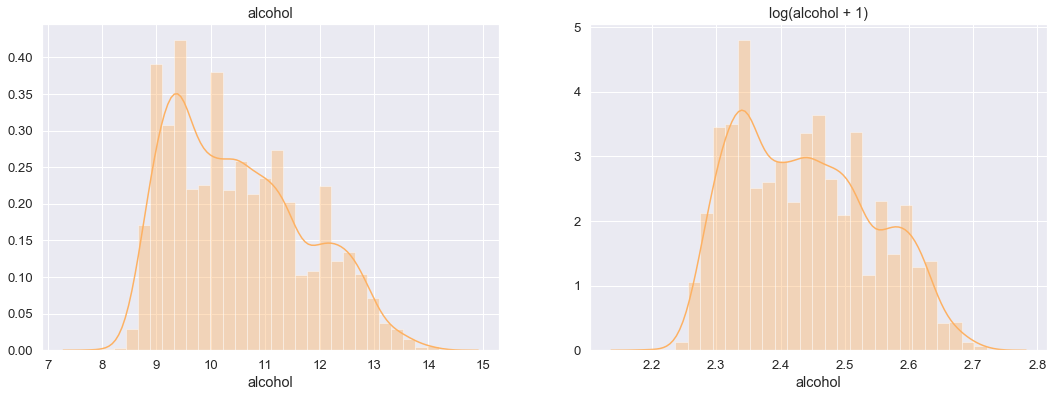

In [16]:
check_dist(white_wine.alcohol, white_wine_log.alcohol)

The transformation helped a bit, but the feature already moderately normally distributed.

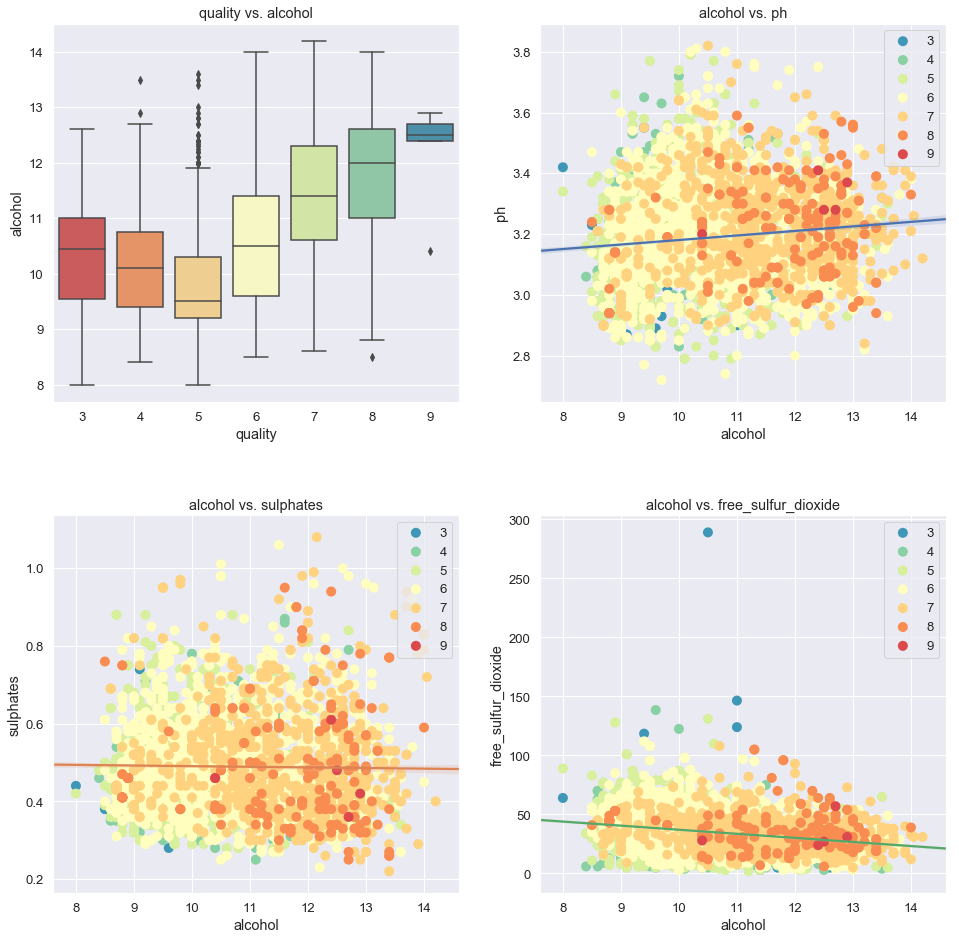

In [17]:
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize=(16, 16))
axes = axes.flatten()
plt.subplots_adjust(hspace=0.3)

sns.boxplot(x = white_wine.quality, y = white_wine.alcohol, palette = 'Spectral', ax = axes[0]).set_title('quality vs. alcohol')
plot_features('alcohol', 'ph', white_wine, axes[1]) 
plot_features('alcohol', 'sulphates', white_wine, axes[2]) 
plot_features('alcohol', 'free_sulfur_dioxide', white_wine, axes[3]) 


We see that alcohol has a pretty strong relationship with quality, which may make it a good indicator. Second, in the graph 'alcohol vs. ph', wines with more alcohol content are better quality, however, the ph levels seem to vary with the range from 1.37-1.5.  In the graph 'alcohol vs. sulphates', we see that better quality wines tend to have a lower sulphate content (0.25-0.4) and higher alcohol content. But also there is more variation in our y variable, sulphates, in this graph. Lastly, we have 'alcohol vs. free_sulfur_dioxide', and these two features seem to very positively correlate with each other- good quality wines tend to have higher alcohol content and free_sulfur_dioxide. 

--ph--
Skew: 0.457642339253789
Kurtosis: 0.5290085383907281

--log(ph + 1)--
Skew: 0.3358152556414338
Kurtosis: 0.34814429305191696


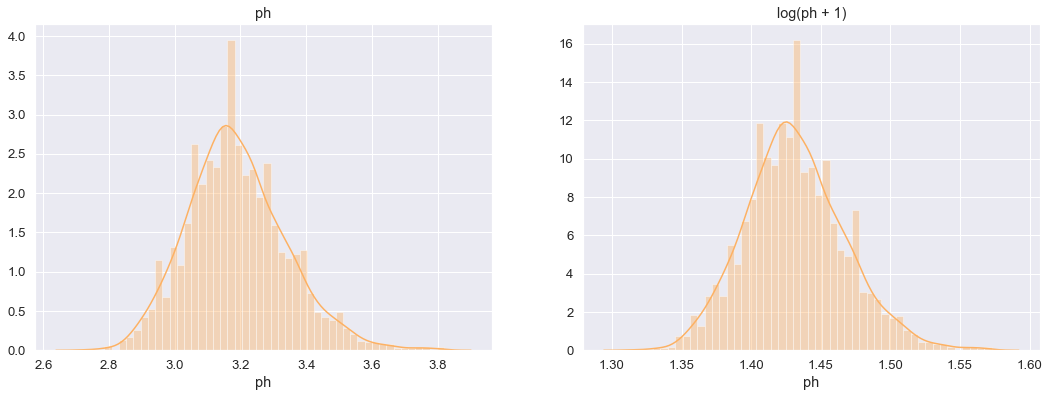

In [18]:
check_dist(white_wine.ph, white_wine_log.ph)

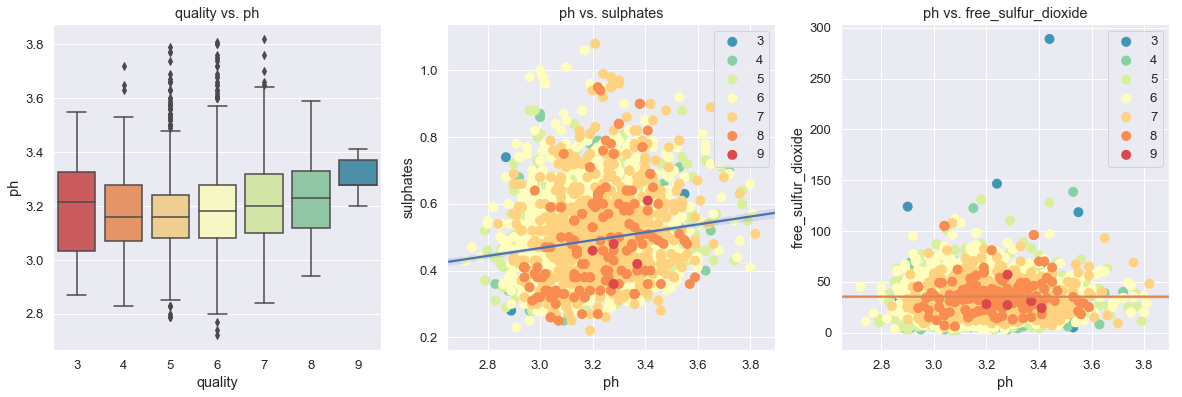

In [19]:
# white wine pH
fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize=(20, 6))
axes = axes.flatten()

sns.boxplot(x = white_wine.quality, y = white_wine.ph, palette = 'Spectral', ax = axes[0]).set_title("quality vs. ph")
plot_features('ph', 'sulphates', white_wine, axes[1]) 
plot_features('ph', 'free_sulfur_dioxide', white_wine, axes[2]) 

We see that ph has a slight positive relationship with quality, but not by much. There is most likely a range of ph that wine makers aim for in order to make their wine enjoyable and not too acidic. Next, in the graph 'ph vs. sulphates', the better wines tend to have lower sulphates. Finally, in 'ph vs. free_sulfur_dioxide', we see that most of the good wines are more concentrated in the upper region of the graph, with higher amounts of free_sulfur_dioxide.

--sulphates--
Skew: 0.9768943947733427
Kurtosis: 1.5880812942840752

--log(sulphates + 1)--
Skew: 0.7058097381526302
Kurtosis: 0.80465827933814


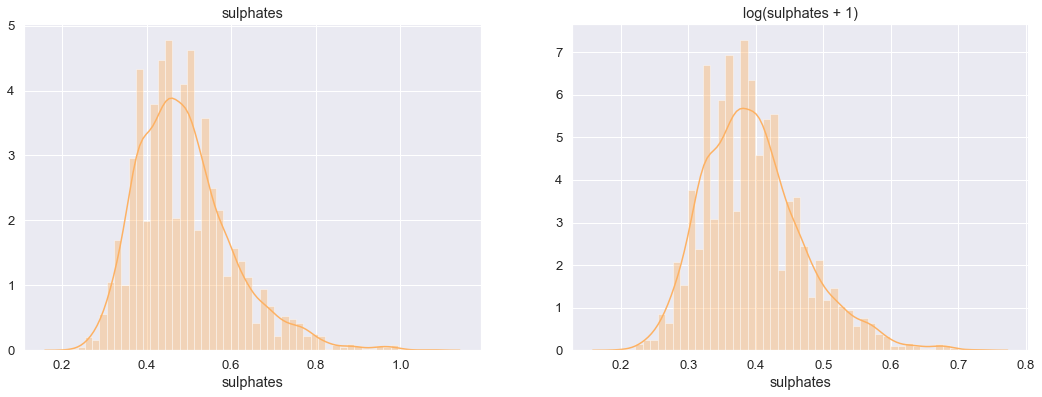

In [20]:
check_dist(white_wine.sulphates, white_wine_log.sulphates)

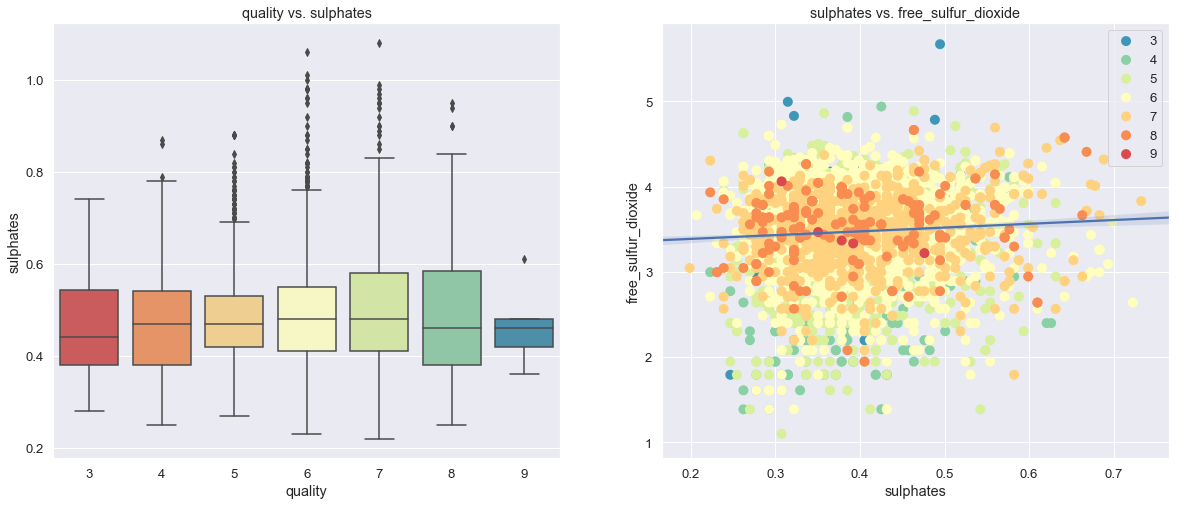

In [21]:
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize=(20, 8))
axes = axes.flatten()

sns.boxplot(x = white_wine.quality, y = white_wine.sulphates, palette = 'Spectral', ax = axes[0]).set_title("quality vs. sulphates")
plot_features('sulphates', 'free_sulfur_dioxide', white_wine_log, axes[1]) 

We do not see much of a relationship here with quality and sulphates. It might seem there is a slight negative relationship because quality = 9 is slightly lower than the others, however, we need to realize that we do not have many samples for that category, so it may be misleading. Here in the second graph, 'sulphates vs. sulfur_dioxide, we see that wine quailities 7, 8, and 9 seem be in roughly the same region.   

--free_sulfur_dioxide--
Skew: -0.828047338719055
Kurtosis: 1.1153147599280793

--log(free_sulfur_dioxide + 1)--
Skew: -0.828047338719055
Kurtosis: 1.1153147599280793


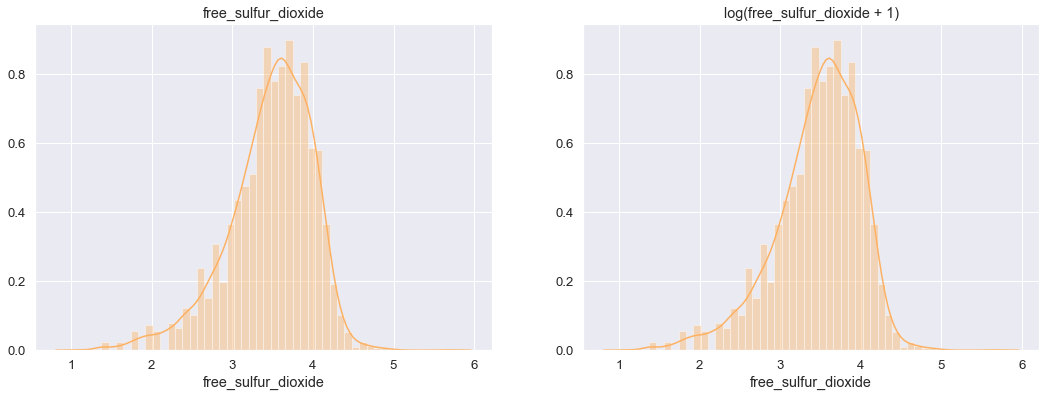

In [22]:
check_dist(white_wine_log.free_sulfur_dioxide, white_wine_log.free_sulfur_dioxide)

Text(0.5,1,'quality vs. free_sulfur_dioxide')

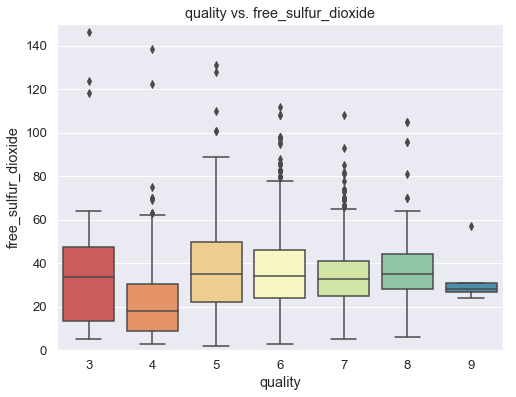

In [23]:
# white wine free_sulfur_dioxide
fig, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x = white_wine.quality, y = white_wine.free_sulfur_dioxide, palette = 'Spectral')
fig.axis(ymin=0, ymax=150);
fig.set_title('quality vs. free_sulfur_dioxide')

It does not look like there is much of a relationship here. The median free_sulfur_dioxide of quality = 4 is slightly lower, but this might be noise, as the medians for the rest of the qualities seem to be roughly equal. 

### Models

Now that we're finished exploring the features of white_wine, we need to pick a model to fulfill our goals. For this exercise, I will be using a regression model. To prepare, I will convert my dependent variable, quality, into a binary variable, where 1 represents 'good'  (quality $>=$ 7) white wine and 0 represents 'bad' (quality $<$ 7) white wine. Since we have a binary dependent varaible, quality (our 'y'), and continuous independent variables (our 'x's'), I have the choice of picking the following models:

1. **Linear Probability Model (LPM)**
2. **Logistic Regression (Logit)**

Each model has its pros and cons, which we will discuss.

In [24]:
# creating bins for 'good' and 'bad' quality wine
# White Wine: 2 bins 'bad'(quality < 6) and 'good'(6 <= quality <= 9)
bins_white = (2, 6, 9)

# 0 represents bad quality wines, while 1 represents good quality wines
groups = [0, 1]
white_wine.quality = pd.cut(white_wine.quality, bins = bins_white, labels = groups)
# white_wine = white_wine[white_wine['quality'] == 1]

Text(0.5,1,'White Wine Quality Distribution (w/ Bins)')

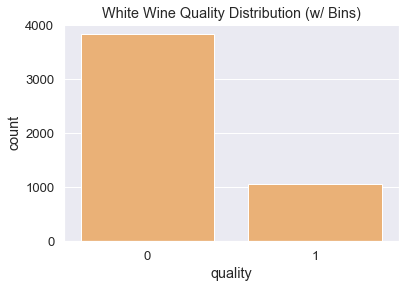

In [25]:
sns.countplot(x=white_wine.quality, color = dark_yellow).set_title('White Wine Quality Distribution (w/ Bins)')

## Linear Probability Model (LPM)

LPM uses Ordinary Least Squares (OLS) as a method to fit the regression. It essentially is using a linear regression with a 0-1 dependent variable.

### Assumptions

In order for our results to be interpretable, it is very important that all of our variables do not violate any of the following. These are the OLS assumptions for multivariate regression.

1. **Linear Relationship**: there should be a linear relationship between the independent variable (y) and its dependent variables (X).
<br>
<br>
2. **No Autocorrelation**: there should be no correlation between the error terms.
<br>
<br>
3. **No Perfect Multicollinearity**: there should be no correlation between the independent variables.
<br>
<br>
4. **No Large Outliers**: there should be no large outliers.
<br>
<br>

**Pros**
- computational easy to estimate
- interpretation is straightforward

**Cons**
- predicted probabilites are unbounded
- errors/residuals are heteroskedastic (non-constant variance)
- non-normality of residuals

In [26]:
import statsmodels.api as sm

X = sm.add_constant(white_wine.drop(['quality'],axis=1))

y = white_wine.quality

# apply OLS
lpm = sm.OLS(y, X).fit()

lpm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.181
Model:                            OLS   Adj. R-squared:                  0.179
Method:                 Least Squares   F-statistic:                     97.86
Date:                Mon, 14 Jan 2019   Prob (F-statistic):          8.48e-202
Time:                        10:00:44   Log-Likelihood:                -2116.7
No. Observations:                4898   AIC:                             4257.
Df Residuals:                    4886   BIC:                             4335.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   62.8266      9.341      6.726      0.000      44.514      81.139
fixed_acidity            0.0461      0.010      4.448      0.000       0.026       0.066
volatile_acidity        -0.3082      0.057     -5.452      0.000      -0.419      -0.197
citric_acid             -0.0351      0.048     -0.738      0.461      -0.128       0.058
residual_sugar           0.0311      0.004      8.306      0.000       0.024       0.038
chlorides               -0.2664      0.271     -0.981      0.326      -0.799       0.266
free_sulfur_dioxide      0.0014      0.000      3.433      0.001       0.001       0.002
total_sulfur_dioxide    -0.0002      0.000     -1.290      0.197      -0.001       0.000
density                -65.2945      9.475     -6.891      0.000     -83.870     -46.719
ph                       0.3370      0.052      6.438      0.000       0.234       0.440
sulphates                0.2764      0.050      5.543      0.000       0.179       0.374
alcohol                  0.0630      0.012      5.235      0.000       0.039       0.087
==============================================================================
Omnibus:                      596.121   Durbin-Watson:                   1.582
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              843.305
Skew:                           1.016   Prob(JB):                    7.56e-184
Kurtosis:                       3.017   Cond. No.                     3.74e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.74e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Checking Linear Relationship

We want to make sure there is a linear relationship between our independent and dependent variables. We will confirm this by plotting 'fitted' values (values our model predicted) against the residuals (errors).

Text(0,0.5,'Residuals')

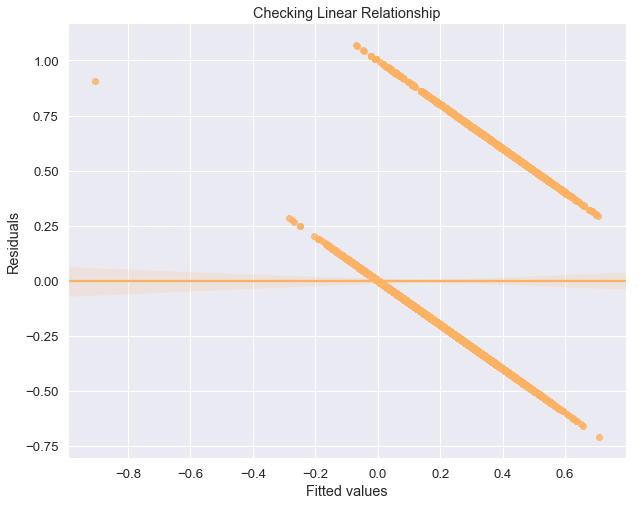

In [27]:
fitted_y = lpm.fittedvalues
residuals = lpm.resid
plt.figure(figsize=(10,8))
sns.regplot(x=fitted_y, y=residuals, color = dark_yellow).set_title('Checking Linear Relationship')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')

This looks like a somewhat well-behaved residuals vs. fitted values plot. Anything on the line represents a correctly predicted quality (error = 0). The 'lines' in our graph comes from the fact that our independent variable is binary. We can see one of the cons mentioned above for LPM, which is that there are predictions that are out bounds, greater than 1 or less than 0. 

### Checking No Autocorrelation
This is important to check because if there is correlation between our error terms, the standard estimated errors tend to underestimate true standard errors, which would affect the confidence interval by making it narrower or wider.

In order to check this we will be using the Durbin-Watson (DW) statistic. This value lies between 0 through 4.  
- if DW = 2 -> no autocorrelation
- if 0 < DW < 2 -> positive autocorrelation
- if 2 < DW < 4 -> negative autocorrelation

In [28]:
from statsmodels.stats.stattools import durbin_watson

residuals = lpm.resid
results = durbin_watson(residuals)
print('DW: {}'.format(results))

DW: 1.5818722799285383


We see that since our DW statistic is between 0 and 2, there is slight positve autocorrelation between the error terms. 

### Checking No Multicollinearity
There should be no correlation between independent variables. This is very important because the goal of regression is to figure out the relationships between our independent variables and our depdendent variable; if independent variables are correlated, it is difficult to pinpoint the exact effect each has on the dependent variable. 

We will be checking this by using the Variance Inflation Factor (VIF).

- VIF $=$ 1 (Not correlated)
- 1 $<$ VIF $<$ 5 (Moderately correlated)
- VIF $>=$ 5 (Highly correlated)

In [29]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

X_vif = white_wine.drop(['quality'],axis=1).assign(const=1)
pd.Series([variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])],index=X_vif.columns).round(3)

fixed_acidity                 2.691
volatile_acidity              1.141
citric_acid                   1.165
residual_sugar               12.644
chlorides                     1.237
free_sulfur_dioxide           1.788
total_sulfur_dioxide          2.239
density                      28.233
ph                            2.196
sulphates                     1.139
alcohol                       7.707
const                   3067855.566
dtype: float64

We see that there is a very high correlations between residual_sugar, density, and alcohol. All other features are very moderately correlated. Let's try and remove some features to see if we can lower the correlation. 

First, notice how density's VIF score is really high! I realize that density is a linear combination of residual_sugar and alcohol. The more alcohol a wine has, the lower its sugar content, and thus lower density. Let's try and remove density, but keep alcohol and residual_sugar. 

Also, I notice that total_sulfur_dioxide is a linear combination of free_sulfur_dioxide and bound sulfur dioxide (not a feature); thus I will create a feature, bound sulfur dioxide by subtracting free_sulfur_dioxide from total_sulfur_dioxide. 

In [30]:
white_wine['bound_sulfur_dioxide'] = white_wine.total_sulfur_dioxide - white_wine.free_sulfur_dioxide
white_wine = white_wine.drop(['total_sulfur_dioxide', 'density'],axis=1)

In [31]:
X_vif = white_wine.drop(['quality'],axis=1).assign(const=1)
pd.Series([variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])],index=X_vif.columns).round(3)

fixed_acidity              1.356
volatile_acidity           1.128
citric_acid                1.160
residual_sugar             1.435
chlorides                  1.204
free_sulfur_dioxide        1.188
ph                         1.331
sulphates                  1.057
alcohol                    1.647
bound_sulfur_dioxide       1.437
const                   1039.130
dtype: float64

A lot less correlation! Since we removed density, we need to re-fit the model. Furthermore, let's decide which independent variables we should keep in our regression through t-tests.

In [32]:
X = sm.add_constant(white_wine.drop(['quality'],axis=1))
y = white_wine.quality
# apply OLS
lpm = sm.OLS(y, X).fit()
lpm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.173
Model:                            OLS   Adj. R-squared:                  0.171
Method:                 Least Squares   F-statistic:                     101.9
Date:                Mon, 14 Jan 2019   Prob (F-statistic):          1.22e-192
Time:                        10:00:45   Log-Likelihood:                -2140.4
No. Observations:                4898   AIC:                             4303.
Df Residuals:                    4887   BIC:                             4374.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -1.5316      0.173     -8.867      0.000      -1.870      -1.193
fixed_acidity           -0.0042      0.007     -0.569      0.570      -0.019       0.010
volatile_acidity        -0.3495      0.056     -6.189      0.000      -0.460      -0.239
citric_acid             -0.0573      0.048     -1.201      0.230      -0.151       0.036
residual_sugar           0.0068      0.001      5.370      0.000       0.004       0.009
chlorides               -0.5728      0.269     -2.129      0.033      -1.100      -0.045
free_sulfur_dioxide      0.0014      0.000      4.056      0.000       0.001       0.002
ph                       0.1106      0.041      2.700      0.007       0.030       0.191
sulphates                0.1842      0.048      3.817      0.000       0.090       0.279
alcohol                  0.1365      0.006     24.425      0.000       0.126       0.147
bound_sulfur_dioxide    -0.0005      0.000     -2.681      0.007      -0.001      -0.000
==============================================================================
Omnibus:                      607.588   Durbin-Watson:                   1.584
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              865.191
Skew:                           1.029   Prob(JB):                    1.34e-188
Kurtosis:                       3.010   Cond. No.                     5.90e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.9e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Selecting Features

I will be selecting features by conducting t-test to see if they are statistically significant or not. Let's first check the distribution of all the features, because these features should be ideally normally distributed for t-tests to be valid.

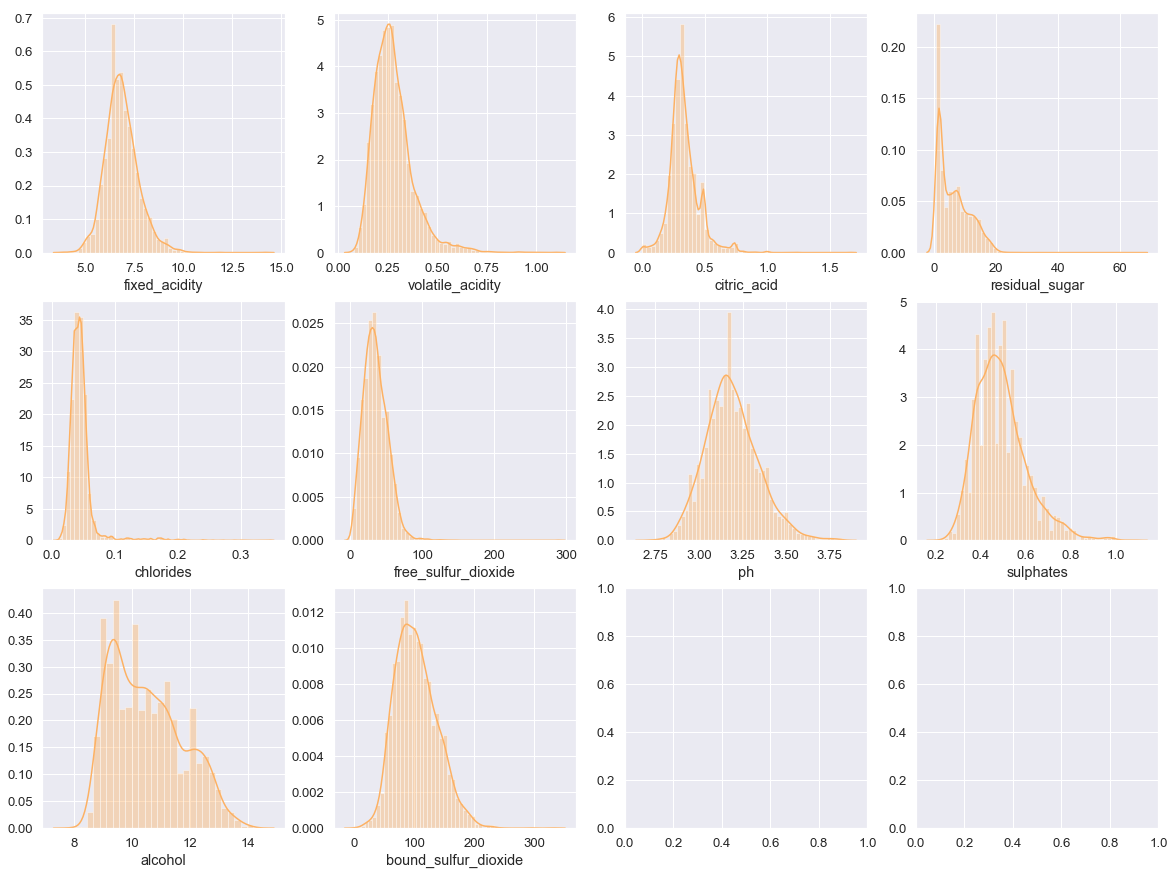

In [33]:
fig, axes = plt.subplots(nrows = 3, ncols = 4, figsize=(20, 15))
axes = axes.flatten()
features = white_wine.drop(['quality'], axis=1).columns
for feature, ax in zip(features, range(len(white_wine.columns)+1)):
    if (feature != 'quality'):
        sns.distplot(white_wine[feature], color = dark_yellow, ax = axes[ax])

#### T-tests

We see that most of the features look roughly normally distributed, but some are not (ie. alcohol). The t-test should still be valid because of the central limit theorem, as a sample size increases (to infinity) the distribution will converge to a normal distribution. 

$ \\ {\alpha} = 0.05$, critical value is ${ \pm 1.96}$

**fixed_acidity**
<br>
<br>
$H_{0}: {\beta}_{fixedacidity} = 0 \\
H_{1}: {\beta_{fixedacidity}} \hspace{1mm} {\neq} \hspace{1mm}  0 \\
t = \frac{{\hat{\beta}_{fixedacidity}} \hspace{1mm} - \hspace{1mm} 0}{\sigma_{fixedacidity}} = \frac{-0.0042 - 0}{0.007} = -0.600 \\$
$\text{Since} -0.600 > -1.96, \text{we fail to reject the null hypothesis. } \textbf{fixed_acidity is not statistically significant.}$ 

**volatile_acidity**
<br>
<br>
$H_{0}: {\beta}_{volatileacidity} = 0 \\
H_{1}: {\beta}_{volatileacidity} \hspace{1mm} {\neq} \hspace{1mm}  0 \\
t = \frac{{\hat{\beta}_{volatileacidity}}  \hspace{1mm} - \hspace{1mm} 0}{\sigma_{volatileacidity}} = \frac{-0.3495 - 0}{0.056} = -6.241 \\$
$\text{Since} -6.241 < -1.96, \text{we reject the null hypothesis. } \textbf{volatile_acidity is statistically significant.}$ 

**citric_acid**
<br>
<br>
$H_{0}: {\beta}_{citricacid} = 0 \\
H_{1}: {\beta}_{citricacid} \hspace{1mm} {\neq} \hspace{1mm}  0 \\
t = \frac{{\hat{\beta}_{citricacid}} \hspace{1mm} -  \hspace{1mm} 0}{\sigma_{citricacid}} = \frac{-0.0573 - 0}{0.048} = -0.985\\$
$\text{Since} -0.985 > -1.96, \text{we fail to reject the null hypothesis. } \textbf{citric_acid is not statistically significant.}$ 

**residual_sugar**
<br>
<br>
$H_{0}: {\beta}_{residualsugar} = 0 \\
H_{1}: {\beta}_{residualsugar} \hspace{1mm} {\neq} \hspace{1mm}  0 \\
t = \frac{{\hat{\beta}_{residualsugar}} \hspace{1mm} -  \hspace{1mm} 0}{\sigma_{residualsugar}} = \frac{0.0068 - 0}{0.001} = 6.7 $

$ \text{Since } 6.7 > 1.96, \text{we reject the null hypothesis. } \textbf{residual_sugar is statistically significant.}$ 

**chlorides**
<br>
<br>
$H_{0}: {\beta}_{chlorides} = 0 \\
H_{1}: {\beta}_{chlorides} \hspace{1mm} {\neq} \hspace{1mm}  0 \\
t = \frac{{\hat{\beta}_{chlorides}} \hspace{1mm} -  \hspace{1mm} 0}{\sigma_{chlorides}} = \frac{-0.5728 - 0}{0.269} = -2.129 \\$
$\text{Since } -2.129 < -1.96, \text{we reject the null hypothesis. } \textbf{chlorides is statistically significant.}$ 

**free_sulfur_dioxide**
<br>
<br>
$H_{0}: {\beta}_{freesulfurdioxide} = 0 \\
H_{1}: {\beta}_{freesulfurdioxide} \hspace{1mm} {\neq} \hspace{1mm}  0 \\
t = \frac{{\hat{\beta}_{freesulfurdioxide}} \hspace{1mm} -  \hspace{1mm} 0}{\sigma_{freesulfurdioxide}} = \frac{0.0014 - 0}{0} = \text{undefined. However, we can find the true value on the chart: } t = 4.056$ 

$\text{Since } 3.970 > 1.96, \text{we reject the null hypothesis. } \textbf{free_sulfur_dioxide is statistically significant.}$ 

**ph**
<br>
<br>
$H_{0}: {\beta}_{ph} = 0 \\
H_{1}: {\beta}_{ph} \hspace{1mm} {\neq} \hspace{1mm}  0 \\
t = \frac{{\hat{\beta}_{ph}} \hspace{1mm} -  \hspace{1mm} 0}{\sigma_{ph}} = \frac{0.1106 - 0}{0.041} = 2.698$ 

$\text{Since } 2.698 > 1.96, \text{we reject the null hypothesis. } \textbf{ph is statistically significant.}$ 


**sulphates**
<br>
<br>
$H_{0}: {\beta}_{sulphates} = 0 \\
H_{1}: {\beta}_{sulphates} \hspace{1mm} {\neq} \hspace{1mm}  0 \\
t = \frac{{\hat{\beta}_{sulphates}} \hspace{1mm} -  \hspace{1mm} 0}{\sigma_{sulphates}} = \frac{0.1842 - 0}{0.048} = 3.838$ 

$\text{Since } 3.838 > 1.96, \text{we reject the null hypothesis. } \textbf{sulphates is statistically significant.}$

**alcohol**
<br>
<br>
$H_{0}: {\beta}_{alcohol} = 0 \\
H_{1}: {\beta}_{alcohol} \hspace{1mm} {\neq} \hspace{1mm}  0 \\
t = \frac{{\hat{\beta}_{alcohol}} \hspace{1mm} -  \hspace{1mm} 0}{\sigma_{alcohol}} = \frac{0.1365 - 0}{0.006} = 22.75$ 

$\text{Since } 22.75 > 1.96, \text{we reject the null hypothesis. } \textbf{alcohol is statistically significant.}$

**bound_sulfur_dioxide**
<br>
<br>
$H_{0}: {\beta}_{boundsulfurdioxide} = 0 \\
H_{1}: {\beta}_{boundsulfurdioxide} \hspace{1mm} {\neq} \hspace{1mm}  0 \\
t = \frac{{\hat{\beta}_{boundsulfurdioxide}} \hspace{1mm} -  \hspace{1mm} 0}{\sigma_{boundsulfurdioxide}} = \frac{-0.0005 - 0}{0.000} = \text{undefined. However, we can find the true value on the chart: } t = -2.681$ 

$\text{Since } -2.681 < -1.96, \text{we reject the null hypothesis. } \textbf{bound_sulfur_dioxide is statistically significant.}$












Thus, we can remove the two non-statistically significant variables,  fixed_acidity and citric_acid, and build the regression with our statistically significant variables.

In [34]:
white_wine = white_wine.drop(['fixed_acidity', 'citric_acid'],axis=1)

### No Large Outliers

#### Cook's Distance

We can identify outliers using a metric called Cooks' distance. I have chosen the criteria: $F_{0.5}(k,n-k)$, where $k$ is the number of regessors and $n$ is our sample size. Thus,

$F_{0.5}\hspace{1mm}(4898 - 8) = 1.94 $

Any points that have an score of 1.94 or above will be considered an outlier.

In [35]:
X = sm.add_constant(white_wine.drop(['quality'],axis=1))
y = white_wine.quality
# apply OLS
lpm = sm.OLS(y, X).fit()

In [36]:
infl = lpm.get_influence()
result = infl.summary_frame()

In [37]:
result.head()

,dfb_const,dfb_volatile_acidity,dfb_residual_sugar,dfb_chlorides,dfb_free_sulfur_dioxide,dfb_ph,dfb_sulphates,dfb_alcohol,dfb_bound_sulfur_dioxide,cooks_d,standard_resid,hat_diag,dffits_internal,student_resid,dffits
0,-0.001508,0.000407,-0.004634,0.000716,0.000455,0.001352,0.000245,0.000617,0.000488,4.518206e-06,-0.142038,0.002012,-0.006377,-0.142024,-0.006376
1,-0.000100,-0.000117,0.000584,0.000132,0.000638,-0.000336,0.000076,0.000695,-0.000236,1.771402e-07,-0.035420,0.001269,-0.001263,-0.035416,-0.001263
2,0.000540,-0.001718,-0.002123,-0.001232,0.001365,-0.004711,0.002112,0.004729,0.008597,1.712257e-05,-0.459977,0.000728,-0.012414,-0.459940,-0.012413
3,0.000831,0.003609,-0.000134,-0.002295,-0.001826,-0.000785,0.005233,-0.001281,-0.005389,1.153496e-05,-0.365619,0.000776,-0.010189,-0.365587,-0.010188
4,0.000831,0.003609,-0.000134,-0.002295,-0.001826,-0.000785,0.005233,-0.001281,-0.005389,1.153496e-05,-0.365619,0.000776,-0.010189,-0.365587,-0.010188


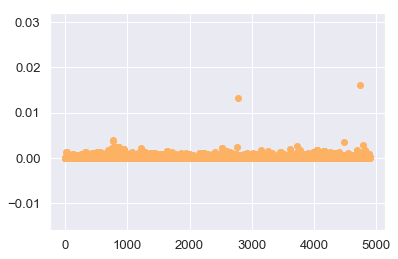

In [38]:
plt.scatter(result.index, result['cooks_d'], color = dark_yellow)

In [39]:
# check to see if there are values greater than or equal to 1.94
print(result['cooks_d'][result['cooks_d'] > 1.94].count())

0


Since no values are over 1.94, we do not need to remove any points.

### Interpreting the Model

In [40]:
X = sm.add_constant(white_wine.drop(['quality'],axis=1))
y = white_wine.quality
# apply OLS
lpm = sm.OLS(y, X).fit()
lpm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.172
Model:                            OLS   Adj. R-squared:                  0.171
Method:                 Least Squares   F-statistic:                     127.1
Date:                Mon, 14 Jan 2019   Prob (F-statistic):          2.89e-194
Time:                        10:00:53   Log-Likelihood:                -2141.5
No. Observations:                4898   AIC:                             4301.
Df Residuals:                    4889   BIC:                             4360.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -1.6308      0.135    -12.055      0.000      -1.896      -1.366
volatile_acidity        -0.3348      0.056     -6.028      0.000      -0.444      -0.226
residual_sugar           0.0068      0.001      5.348      0.000       0.004       0.009
chlorides               -0.5992      0.267     -2.246      0.025      -1.122      -0.076
free_sulfur_dioxide      0.0014      0.000      4.101      0.000       0.001       0.002
ph                       0.1287      0.037      3.487      0.000       0.056       0.201
sulphates                0.1792      0.048      3.722      0.000       0.085       0.274
alcohol                  0.1362      0.006     24.466      0.000       0.125       0.147
bound_sulfur_dioxide    -0.0005      0.000     -2.931      0.003      -0.001      -0.000
==============================================================================
Omnibus:                      608.230   Durbin-Watson:                   1.586
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              866.394
Skew:                           1.030   Prob(JB):                    7.33e-189
Kurtosis:                       3.014   Cond. No.                     5.80e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.8e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**volatile_acidity**:increasing volatile_acidity by one unit, all else equal, will decrease the probability of a wine being good by 33.48%.

**residual_sugar**: increasing residual_sugar by one unit, all else equal, will increase the probability of a wine being good by 0.68%.

**chlorides**: increasing chlorides by one unit, all else equal, will decrease the probability of a wine being good by 59.92%.
	
**free_sulfur_dioxide**: increasing free_sulfur_dioxide by one unit, all else equal, will increase the probability of a wine being good by 0.14%.

**ph**: increasing ph by one unit, all else equal, will increase the probability of a wine being good by 12.87%.

**sulphates**: increasing sulphates by one unit, all else equal, will increase the probability of a wine being good by 17.92%.

**alcohol**: increasing alcohol by one unit, all else equal, will increase the probability of a wine being good by 13.62%.

**bound_sulfur_dioxide**: increasing bound_sulfur_dioxide by one unit, all else equal, will decrease the probability of a wine being good by 0.05%.

## Logistic Regression (Logit)

Logit uses Maximum Likelihood Estimation (MLE) to fit the regression.

### Assumptions 

1. **Binary Dependent Variable**: requires the dependent variable to be binary.
<br>
<br>
2. **Samples are i.i.d.**: samples should be independent of each other. 
<br>
<br>
3. **No Perfect Multicollinearity**: there should be no correlation between the independent variables. 
<br>
<br>
4. **Linearity of Independent Variables and Log Odds**: requires that the independent variables are linearly related to the log odds.
<br>
<br>
5. **Large Sample Size**

**Pros**
- predictions bounded from 0 to 1

**Cons**
- more difficult to interpret (log odds)
- can be computational expensive


We already satisfied assumptions 1, 2, and 5. Also, from our analysis with LPM, we already proved there is little multicollinearity between the independent variables. All that is left is to check assumption 4!

## Linearity of Independent Variables and Log Odds


In [41]:
X = sm.add_constant(white_wine.drop(['quality'],axis=1))
y = white_wine.quality

logit = sm.Logit(y, X).fit()

Optimization terminated successfully.
         Current function value: 0.428939
         Iterations 7


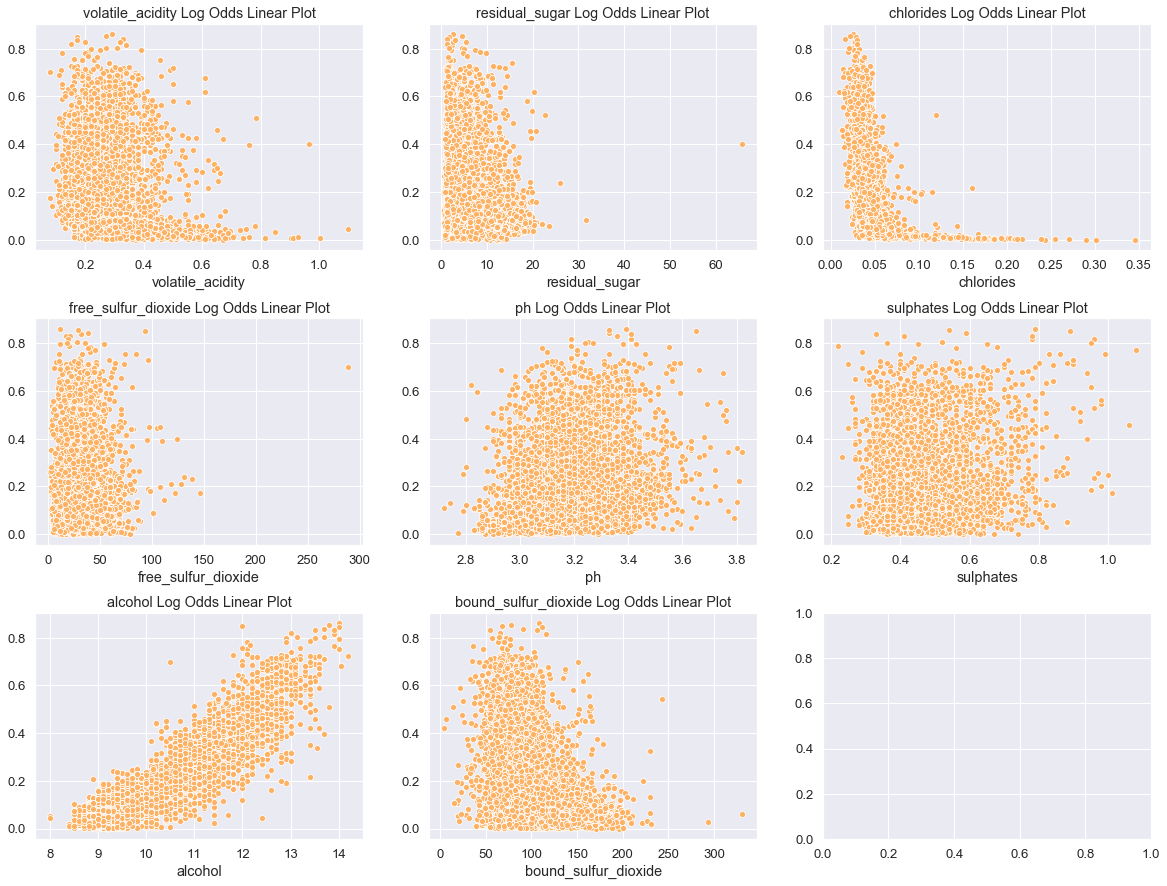

In [42]:
fig, axes = plt.subplots(nrows = 3, ncols = 3, figsize=(20, 15))
axes = axes.flatten()
plt.subplots_adjust(hspace=0.3)
features = white_wine.drop(['quality'], axis=1).columns
log_odds = logit.predict(X)
for feature, ax in zip(features, range(len(white_wine.columns)+1)):
    if (feature != 'quality'):
        sns.scatterplot(x=white_wine[feature], y=log_odds, ax = axes[ax], color = dark_yellow).set_title("{} Log Odds Linear Plot".format(feature)) 
        
       

The scatter plots show that volatile_acidity, free_sulfur_dioxide, ph, sulphates, and alcohol have linear realtionships with the log-odds. On the other hand, residual_sugar, chlorides, and bound_sulfur_dioxide do not look as linear. We could perform some transformations (ie. square-root, 2 or 3-power terms, etc.) on these variables, but since these transformations will limit the interpretation of these variables, I will not be performing them.

In [43]:
X = sm.add_constant(white_wine.drop(['quality'],axis=1))
y = white_wine.quality

logit = sm.Logit(y, X).fit()
logit.summary2()

Optimization terminated successfully.
         Current function value: 0.428939
         Iterations 7


<class 'statsmodels.iolib.summary2.Summary'>
"""
                             Results: Logit
========================================================================
Model:                Logit              Pseudo R-squared:   0.179      
Dependent Variable:   quality            AIC:                4219.8839  
Date:                 2019-01-14 10:00   BIC:                4278.3532  
No. Observations:     4898               Log-Likelihood:     -2100.9    
Df Model:             8                  LL-Null:            -2558.4    
Df Residuals:         4889               LLR p-value:        3.4699e-192
Converged:            1.0000             Scale:              1.0000     
No. Iterations:       7.0000                                            
------------------------------------------------------------------------
                      Coef.   Std.Err.    z     P>|z|   [0.025   0.975] 
------------------------------------------------------------------------
const                -13.3987   1.0068 -13.3076 0.0000 -15.3721 -11.4253
volatile_acidity      -3.7453   0.4707  -7.9566 0.0000  -4.6679  -2.8227
residual_sugar         0.0552   0.0097   5.6605 0.0000   0.0361   0.0743
chlorides            -18.1374   3.8429  -4.7197 0.0000 -25.6693 -10.6055
free_sulfur_dioxide    0.0093   0.0025   3.8041 0.0001   0.0045   0.0141
ph                     1.1357   0.2570   4.4194 0.0000   0.6320   1.6393
sulphates              1.2330   0.3191   3.8646 0.0001   0.6077   1.8583
alcohol                0.8598   0.0439  19.5967 0.0000   0.7738   0.9458
bound_sulfur_dioxide  -0.0034   0.0014  -2.4128 0.0158  -0.0061  -0.0006
========================================================================

"""

**volatile_acidity**: increasing volatile_acidity by one unit, all else equal, will decrease the log-odds of quality by 3.75.

**residual_sugar**: increasing residual_sugar by one unit, all else equal, will increase the log-odds of quality by 5.52%.

**chlorides**: increasing chlorides by one unit, all else equal, will decrease the log-odds of quality by 18.14.
	
**free_sulfur_dioxide**: increasing free_sulfur_dioxide by one unit, all else equal, will increase the log-odds of quality by 0.93%.

**ph**: increasing ph by one unit, all else equal, will increase the log-odds of quality by 1.14%.

**sulphates**: increasing sulphates by one unit, all else equal, will increase the log-odds of quality by 1.23.

**alcohol**: increasing alcohol by one unit, all else equal, will increase the log-odds of quality by 0.86.

**bound_sulfur_dioxide**: increasing bound_sulfur_dioxide by one unit, all else equal, will decrease the log-odds of quality by 0.0034.

## Choosing between LPM and Logit

In order to choose between LPM and Logit we should first consider if the data how the data fits into each model. For the LPM to fit well, we need to check what types of probabilties are being predicted. If these values are above 1 or below 0, this model might not be the best fit. However, if the predicted probabilities are between 0.2 and 0.8, the two models should give nearly indistinguishable results, thus I would favor the LPM because it will be easier to interpret. On the other hand, for the Logit to fit better than LPM, it must be the case that the log-odds have a linear relationship with our independent variables, but a nonlinear relationship with the probabilities.

In [44]:
X = sm.add_constant(white_wine.drop(['quality'],axis=1))
y = white_wine.quality

lpm_results = sm.OLS(y,X).fit()
logit_results = sm.Logit(y, X).fit()

Optimization terminated successfully.
         Current function value: 0.428939
         Iterations 7


###  Calculating $p$


#### Linear Probability Model

This model assumes that the probability p is a linear function of the regressors. Thus, solving for p would be the following:

$$ p = \beta_{0} + \beta_{1}x_{1} + \dots +  \beta_{k}x_{k} \\ $$

#### Logistic Regression

On the other hand, the logistic model assumes that the natural log of the odds is a linear function of the independent variables. We have the following equation:

$$y = \ln(\frac{p}{1-p}) = \beta_{0} + \beta_{1}x_{1} + \dots +  \beta_{k}x_{k} $$

where $\ln(\frac{p}{1-p})$ are the log-odds and $p$ is the probability.

By using the $\text{predict(X)}$ function in statsmodel, we solve for the log-odds. In order to solve for p we must calculate the following: 

$$
y = \ln(\frac{p}{1-p}) = \beta_{0} + \beta_{1}x_{1} + \dots +  \beta_{k}x_{k} \\[10pt]
\rightarrow \exp({\ln(\frac{p}{1-p})}) = \exp(y) \\[10pt]
\rightarrow \frac{p}{1-p} = e^{y} \\[10pt]
\rightarrow p = (1-p)e^{y} \\[10pt]
\rightarrow p = e^{y} - pe^{y} \\[10pt]
\rightarrow p + pe^{y} = e^{y} \\[10pt]
\rightarrow p(1 + e^{y}) = e^{y} \\[10pt]
\rightarrow p = \frac{e^{y}}{1 + e^{y}} \\[10pt]
\rightarrow p = \frac{e^y}{1 + e^y} \\ \\
$$

To simplify it further:

$$ 
p = \frac{e^y}{1 + e^y} \times \frac{e^{-y}}{e^{-y}} \\[10pt]
\rightarrow \frac{e^y \times e^{-y}}{e^{-y} + e^{y} \times e^{-y}} \\[10pt]
\rightarrow \frac{1}{1 + e^{-y}} \\[10pt]
$$

Now that we have solved for the probability for both models, let's test to see which model fits better. First, I will be testing the LPM by checking what type of probabilities it will produce. Then, I will check the logit to see if it fits better by testing linearity of log-odds and probabilities.

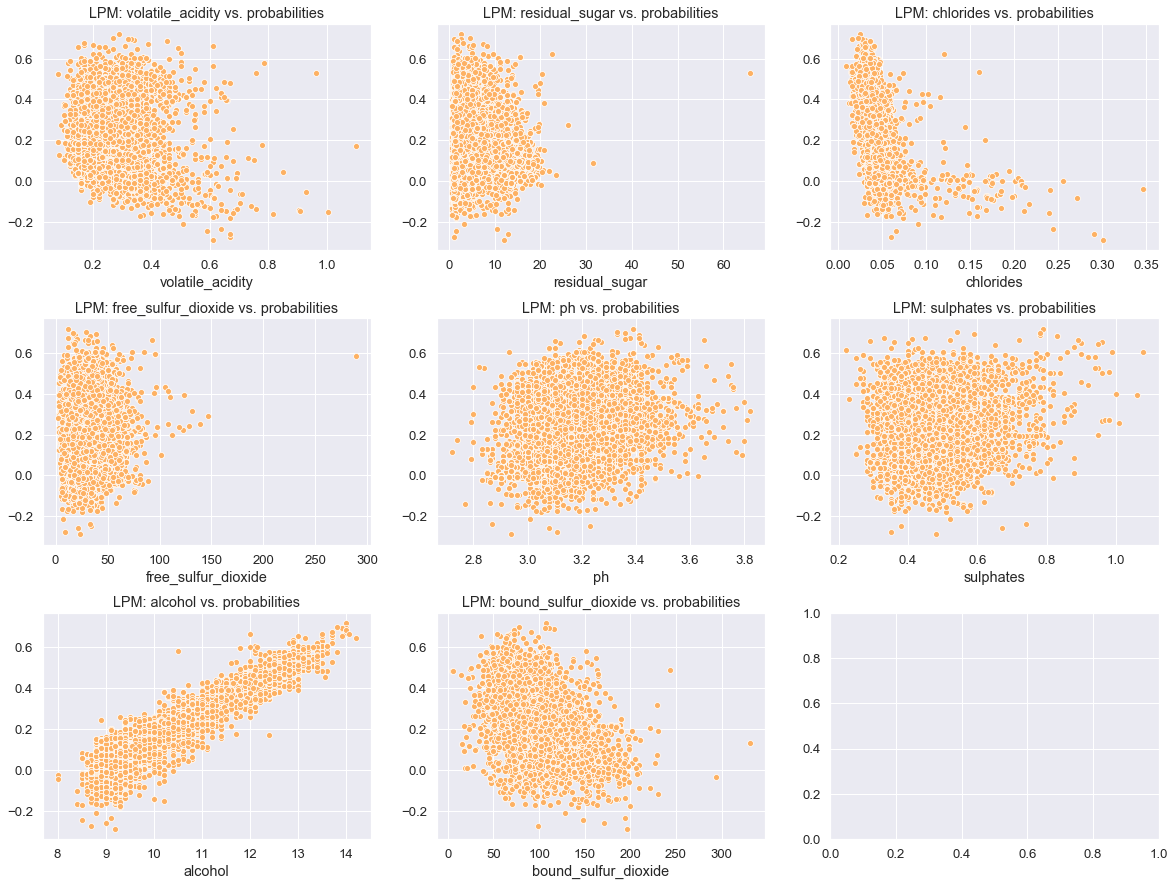

In [45]:
lpm_probabilities = lpm_results.predict(X)

# check linearity against independent variables
fig, axes = plt.subplots(nrows = 3, ncols = 3, figsize=(20, 15))
axes = axes.flatten()
plt.subplots_adjust(hspace=0.3)
features = white_wine.drop(['quality'], axis=1).columns
for feature, ax in zip(features, range(len(white_wine.columns)+1)):
    if (feature != 'quality'):
        sns.scatterplot(x=white_wine[feature], y=lpm_probabilities, ax = axes[ax], color = dark_yellow).set_title("LPM: {} vs. probabilities".format(feature)) 
        
       

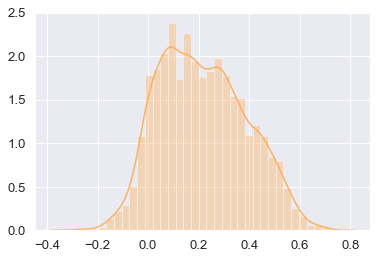

In [46]:
sns.distplot(lpm_probabilities, color = dark_yellow)

In [47]:
print('LPM Probabilities Below 0: {}'.format(lpm_probabilities[lpm_probabilities.values < 0].count()))
print('LPM Probabilities Above 1: {}'.format(lpm_probabilities[lpm_probabilities.values > 1].count()))

LPM Probabilities Below 0: 458
LPM Probabilities Above 1: 0


We notice that we have a wide range of probabilties, meaning that our model will produce extreme values. Upon expection, 458 values are below 0! This most likely means that this model is not the best fit. It is possible to try non-linear transformations of X to see if they correct our issue. However, often times it is not trivial to find these transformations and, in addition, we will lose interpretability of the model. Let's continue by checking the Logit.

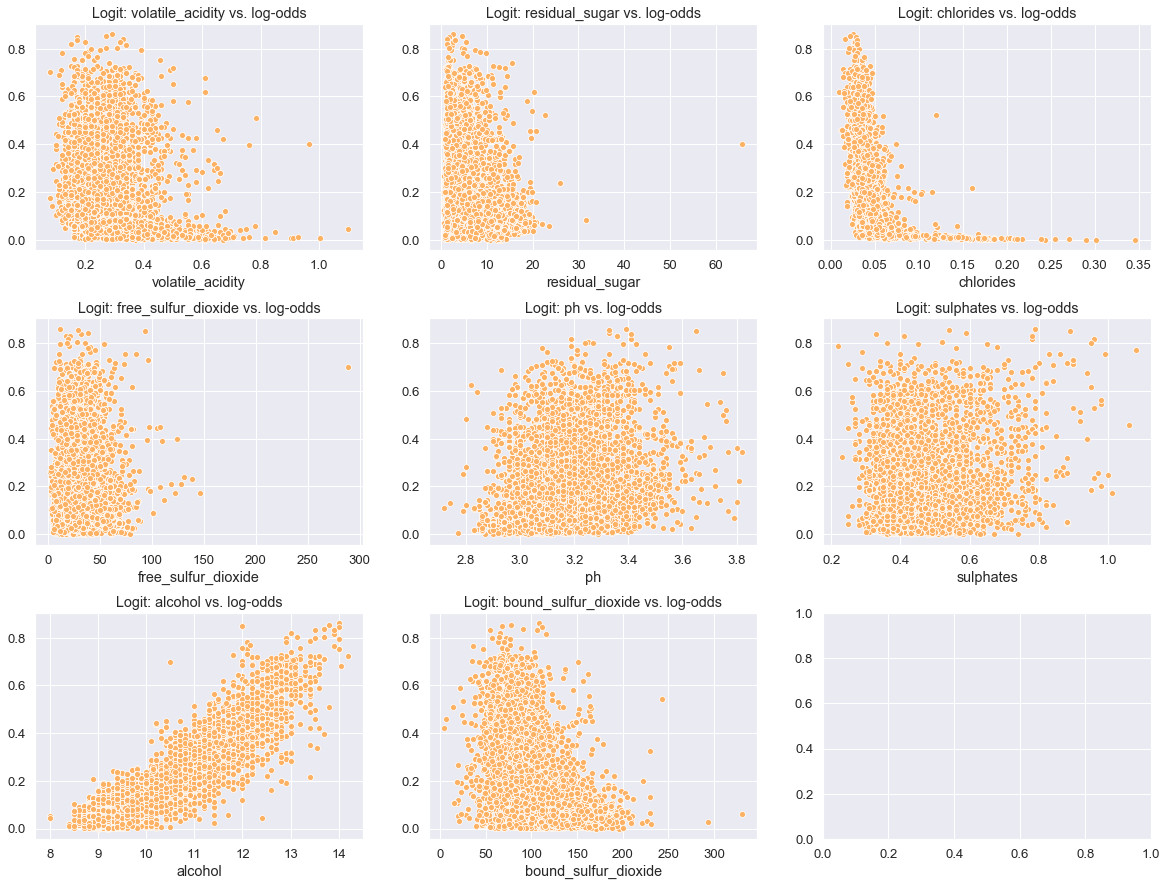

In [48]:
log_odds = logit_results.predict(X)
logit_probabilities = (1) / (1 + np.exp(-log_odds))

# check linearity of log-odds against independent variables
fig, axes = plt.subplots(nrows = 3, ncols = 3, figsize=(20, 15))
axes = axes.flatten()
plt.subplots_adjust(hspace=0.3)
features = white_wine.drop(['quality'], axis=1).columns
for feature, ax in zip(features, range(len(white_wine.columns)+1)):
    if (feature != 'quality'):
        sns.scatterplot(x=white_wine[feature], y=log_odds, ax = axes[ax], color = dark_yellow).set_title("Logit: {} vs. log-odds".format(feature)) 
        
       

Upon seeing the results, we see that all of the independent variables, except for chlorides, have a linear relationship with the log-odds. Also, notice that the Logit produces probabilites between 0 and 0.85. Since our model is producing a wide variety of probabilities, it is best to use the Logit because the LPM will produce extreme values. Now, let's check the relationship between log-odds and the independent variables. A good rule of thumb is that if the probabilites are between 0.2 and 0.8, log-odds will be linearly related to the independent variables.

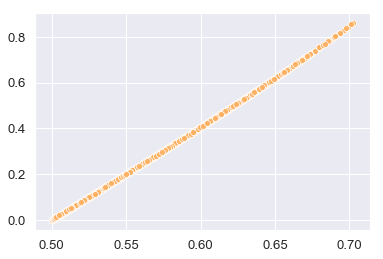

In [49]:
sns.scatterplot(x=logit_probabilities, y=log_odds, color = dark_yellow)

We confirmed that there is a linear relationship between probability, log-odds, and our independent variables. This means that LPM and Logit should fit similarly. However, since there is a good percentage of examples that are predicted below 0 in the LPM, we prefer the Logit.

### Fitting the Final Model: Logistic Regression

In [50]:
logit_final = sm.Logit(y, X).fit()

Optimization terminated successfully.
         Current function value: 0.428939
         Iterations 7


In [51]:
# convert log-odds to odds for ease of interpretation
logit_final_odds = np.exp(logit_final.params)
np.round(logit_final_odds, 3)

const                   0.000
volatile_acidity        0.024
residual_sugar          1.057
chlorides               0.000
free_sulfur_dioxide     1.009
ph                      3.113
sulphates               3.432
alcohol                 2.363
bound_sulfur_dioxide    0.997
dtype: float64

**volatile_acidity**: increasing volatile_acidity by one unit, all else equal, will increase the odds of the wine quality being good by 2.4%.

**residual_sugar**: increasing residual_sugar by one unit, all else equal, will increase the odds of the wine quality being good by 105.7%.

**chlorides**: increasing chlorides by one unit, all else equal, will increase the odds of the wine quality being good by 0%.
	
**free_sulfur_dioxide**: increasing free_sulfur_dioxide by one unit, all else equal, will increase the odds of the wine quality being good by 100.9%.

**ph**: increasing ph by one unit, all else equal,  will increase the odds of the wine quality being good by 311.3%.

**sulphates**: increasing sulphates by one unit, all else equal,  will increase the odds of the wine quality being good by 343.2%.

**alcohol**: increasing alcohol by one unit, all else equal,  will increase the odds of the wine quality being good by 236.3%.

**bound_sulfur_dioxide**: increasing bound_sulfur_dioxide by one unit, all else equal,  will increase the odds of the wine quality being good by 99.7%.

### Deploying the Model

In [54]:
import pickle    

# save model to disk using pickle
logit_final.save("fitted-logit.pickle")

# save model results to csv
with open('white-wine-final-logit-summary.csv', 'w') as fh:
    fh.write(logit_final.summary().as_csv())

### Conclusion

Looking back at the initial objective, the main goal was to establish the conditions that determine the quality of white wine. Through this diagnostic, we were able to verify the assumptions and in turn, train two types of regression models: the Linear the Linear Probability Model and the Logistic Regression. When tested on both, the conclusion was that the nonlinear Logistic model was a better fit for the given data. Upon closer examination, it was discovered that there are several components that influences the overall quality of white wine. Specifically, pH, sulphates and alcohol are the top three best determining factors. 

pH determines the level of acidity in a wine or the level of “tartness”. This can also indirectly be led to judge the “body” of a wine. Majority of people prefer lower-acidity wines since their less of a “burning” sensation when swallowing such wines. Low-acidity wines correspond with a taste that is rounder and richer. To give more background information on acidity and pH levels, they are largely caused by the climate in which the grapes are grown in. Colder and drier regions tend to produce more acidic and “fresh-tasting” wines while warmer and humid areas produce less acidity. More acidity means less natural sugars, which doesn’t allow for a greater alcohol content and thus less body. This is the main reason white wines are usually fresher, crisper, more elegant and a little more tart than red wines.

Next, sulphates are an important factor to the wine-making process and also to determining the quality of a wine. Sulphates are additives for the wine maker as a method to preserve wines and to keep the taste as “fresh” as possible. It works by preventing oxidation within the aging process, which keeps wines at their current fresh state. In addition, sulphates are crucial to extend white wines’ shelf life; without it, white wines on average can only stay on a shelf for six months! 

Finally, alcohol content can greatly help identify the quality of the wine. Alcohol content directly correlates with the sugar content in a wine. Grape varietals used to create white wines are typically not picked at peak of ripeness due to several reasons such as the climate or the wine makers’ decision to preserve some flavor profile within the grapes. This means the sugars in the grapes have yet to be fully developed and sugar directly correlates to alcohol during the preservation process.

In conclusion, these three factors play large roles in the quality judgement of white wines. However, while it does give us great insight in a wine’s background, there are also other factors to wine that can determine its quality. Next time, when you go to a store, be sure to make note of these features (if possible) when determining what wine to bring home!

### Ways to improve
1. Try out new feature transformations (ie. non-linear transformations) to see if the data fits better
2. Look into new regression models, such as RandomForestRegressor
3. Explore density, alcohol, and residual_sugar features and figure out their exact relationship (make more rigorous)